<a href="https://colab.research.google.com/github/learneverythingai/Shivam-Modi-Data-Science-Analytics-Course/blob/main/Machine%20Learning%20Course/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**Exploratory Data Analysis for Predicting Car Prices**</center>


Here I use exploratory data analysis to better understand the data. 

In [1]:
# importing essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading the file
path = "https://drive.google.com/uc?export=download&id=1_GcSxqk41IClDjSFg1nQndRsC9gPozgV"
df = pd.read_csv(path)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


### Check the datatypes
In Machine learning, it is very important to know the datatypes of the independent and dependent variables; it provides the basis for selecting classification or regression models.

In [3]:
# check datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


### Dropping Duplicate Rows


In [4]:
# check for non-null values in each column
df.count()

name             8128
year             8128
selling_price    8128
km_driven        8128
fuel             8128
seller_type      8128
transmission     8128
owner            8128
mileage          7907
engine           7907
max_power        7913
torque           7906
seats            7907
dtype: int64

In [5]:
# drop duplicates
df = df.drop_duplicates()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
# check count of non-null values in each column
df.count()

name             6926
year             6926
selling_price    6926
km_driven        6926
fuel             6926
seller_type      6926
transmission     6926
owner            6926
mileage          6718
engine           6718
max_power        6721
torque           6717
seats            6718
dtype: int64

### Dropping missing values

In [7]:
# check for count of null values in each column
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64

In [8]:
# drop missing values
df = df.dropna() 

In [9]:
# Make sure that missing values are removed
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64


### Feature Splitting
If columns of data aren't in the correct form, we can split features to make them useful for our models.

In [10]:
# split mileage, engine and max_power to remove its units and keep only numerical values
df['mileage'] = df["mileage"].str.split(" ",expand=True)[0]
df['mileage'] = df['mileage'].astype('float64')
df['engine'] = df["engine"].str.split(" ",expand=True)[0]
df['engine'] = df['engine'].astype('float64')
df['max_power'] = df["max_power"].str.split(" ",expand=True)[0]
df['max_power'] = df['max_power'].astype('float64')

In [11]:
# feature splitting on brand names
df['brand'] = df['name'].str.split(" ",expand=True)[0] + ' ' + df['name'].str.split(" ",expand=True)[1]
df['brand'].value_counts()

brand
Maruti Swift       620
Maruti Alto        394
Hyundai i20        303
Maruti Wagon       245
Toyota Innova      188
                  ... 
Renault Koleos       1
Nissan Teana         1
Skoda Yeti           1
Force Gurkha         1
Maruti S-Presso      1
Name: count, Length: 200, dtype: int64

In [12]:
# use describe function
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,19.466585,1430.985857,87.766100,5.434271
std,3.897402,5.235504e+05,5.870328e+04,4.048102,493.469198,31.724555,0.983805
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,16.800000,1197.000000,67.100000,5.000000
50%,2014.000000,4.200000e+05,6.820300e+04,19.440000,1248.000000,81.830000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,22.500000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


### Feature Creation
Sometimes we need to create new features so that our data makes more sense and it becomes easy for the model to learn and intepret.

Example, we have a column 'year' which represents in which year, the car was bought. But, if we create a new feature that shows how old the car is,  Here, it makes more sense to create a column that shows how old the car is, which will help with predicitng the price of the car. 

In [13]:
# create a new feature which shows how old the car is
current_year = 2023
df['old'] = current_year - df['year']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,old
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,Maruti Swift,9
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,Skoda Rapid,9
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,Honda City,17
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,Hyundai i20,13
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti Swift,16


### Dropping irrelevant columns


In [14]:
# drop name, year and torque column
cols_to_drop = ['name','year','torque']
df.drop(cols_to_drop,axis=1,inplace=True)

### Renaming the columns

In [15]:
# rename the columns as shown above 
renamed_columns = {'selling_price':'price','km_driven':'kms','seller_type':'seller','max_power':'power'}
df = df.rename(columns = renamed_columns)
df.head()

,price,kms,fuel,seller,transmission,owner,mileage,engine,power,seats,brand,old
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti Swift,9
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda Rapid,9
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda City,17
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai i20,13
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti Swift,16


### Handling Outliers

In [16]:
# show df columns with numerical datatypes
df.loc[:, df.dtypes != object]

,price,kms,mileage,engine,power,seats,old
0,450000,145500,23.40,1248.0,74.00,5.0,9
1,370000,120000,21.14,1498.0,103.52,5.0,9
2,158000,140000,17.70,1497.0,78.00,5.0,17
3,225000,127000,23.00,1396.0,90.00,5.0,13
4,130000,120000,16.10,1298.0,88.20,5.0,16
...,...,...,...,...,...,...,...
8121,260000,50000,18.90,998.0,67.10,5.0,10
8122,475000,80000,22.54,1396.0,88.73,5.0,9
8123,320000,110000,18.50,1197.0,82.85,5.0,10
8124,135000,119000,16.80,1493.0,110.00,5.0,16


### Boxplot for Outliers

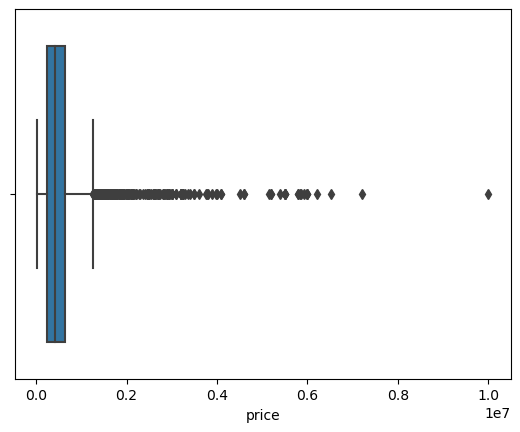

In [17]:
# show the boxplot for price column to look at outliers 
sns.boxplot(x=df['price'])
plt.show()

Here, I will keep the outliers because they belong to the target/dependent column. If I remove these values, it may harm the quality of the results. 

#### Handling outliers for the 'old' feature/column

Here I create limits used to remove unwanted outliers. 


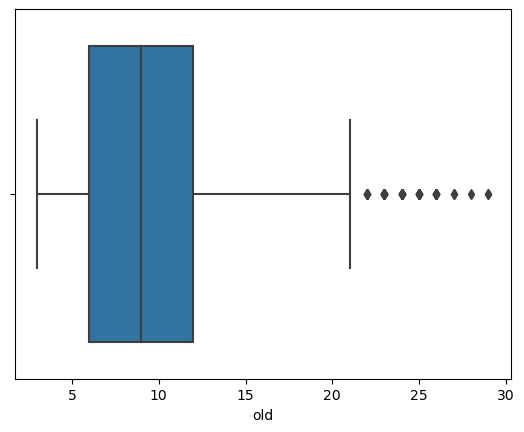

In [18]:
# show the boxplot for price column to look at outliers 
sns.boxplot(x=df['old'])
plt.show()

In [19]:
# set the upper limit and lower limit and apply it for outliers
upper_lim = df['old'].quantile(0.95)
lower_lim = df['old'].quantile(0.05)
df.loc[(df['old'] > upper_lim),'old'] = upper_lim
df.loc[(df['old'] < lower_lim),'old'] = lower_lim

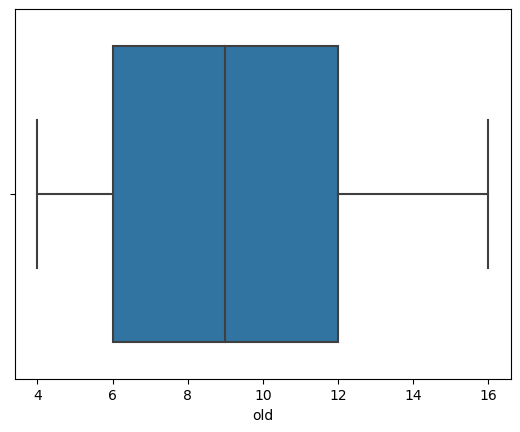

In [20]:
sns.boxplot(x=df['old'])
plt.show()

#### I continue removing outliers from the remaing independent variables. 

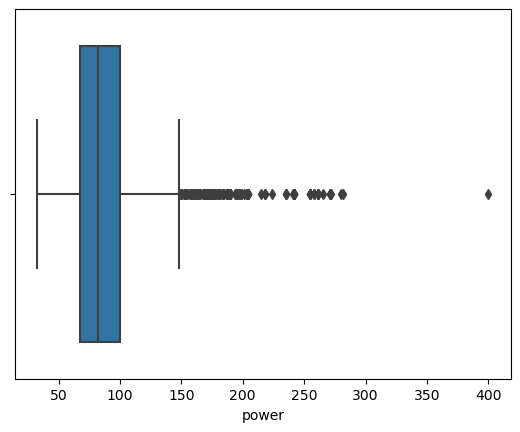

In [21]:
# show the boxplot for "power" column
sns.boxplot(x=df['power'])
plt.show()

In [22]:
# Capping the outliers
upper_lim = df['power'].quantile(0.95)
lower_lim = df['power'].quantile(0.05)
df.loc[(df['power'] > upper_lim),'power'] = upper_lim
df.loc[(df['power'] < lower_lim),'power'] = lower_lim

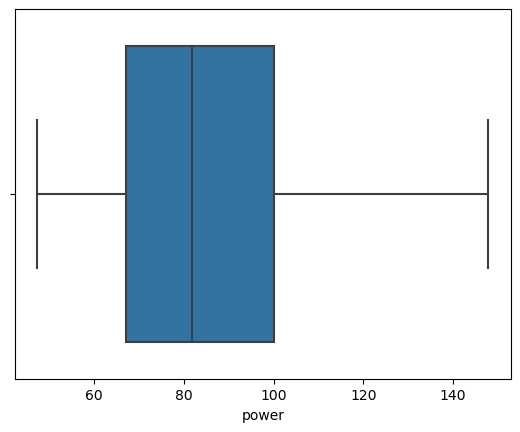

In [23]:
# show the boxplot and observe the difference
sns.boxplot(x=df['power'])
plt.show()

#### KMS

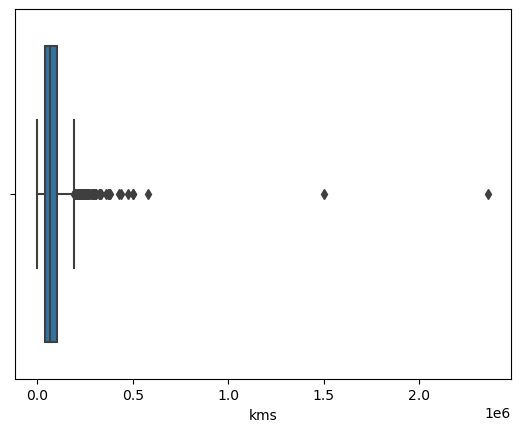

In [24]:
# show the boxplot for 'kms' column
sns.boxplot(x=df['kms'])
plt.show()

In [25]:
# set the upper limit and lower limit for removing the outliers
factor = 3
upper_lim = df['kms'].mean() + df['kms'].std() * factor
lower_lim = df['kms'].mean() - df['kms'].std() * factor

In [26]:
# apply that change on new data
df = df[(df['kms'] < upper_lim) & (df['kms'] > lower_lim)]

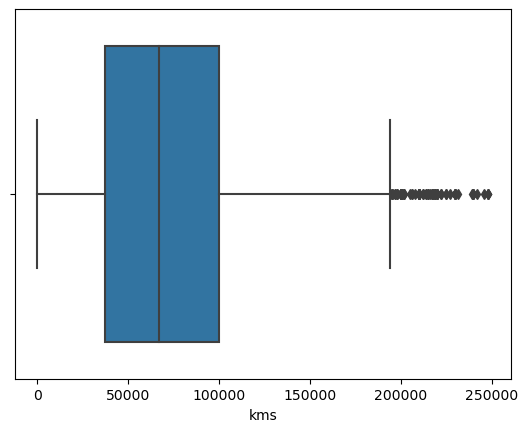

In [27]:
# show the boxplot and observe the change
sns.boxplot(x=df['kms'])
plt.show()

Steps to eliminate outliers:
- Sort the dataset in ascending order
- calculate the 1st and 3rd quartiles(Q1, Q3)
- compute IQR=Q3-Q1
- give a suitable threshold and compute lower bound = (Q1–1.5\*IQR), upper bound = (Q3+1.5\*IQR)
- eliminate those above upper bound and those below lower bound

#### 'engine'

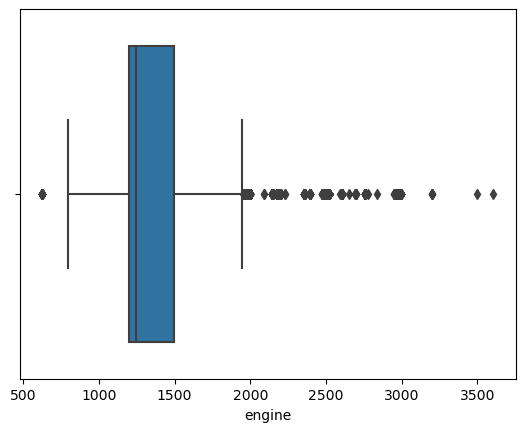

In [28]:
# show the boxplot for "engine" column
sns.boxplot(x=df['engine'])
plt.show()

In [29]:
# set q1 and q3 values, determine IQR, set upper bound and lower bound and apply it on our DataFrame df for 'engine' column
q1 = df['engine'].quantile(0.25)
q3 = df['engine'].quantile(0.75)
IQR = q3 - q1 
lower_bound = q1-(1.5*IQR)
upper_bound = q3+(1.5*IQR)
df = df[~((df['engine'] < lower_bound) | (df['engine'] > upper_bound))]

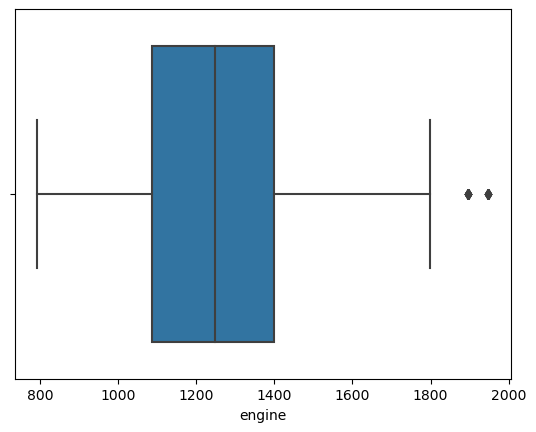

In [30]:
# show the boxplot for 'engine' column and observe the difference
sns.boxplot(x=df['engine'])
plt.show()

#### 'mileage'
We will repeat same method for mileage column now.

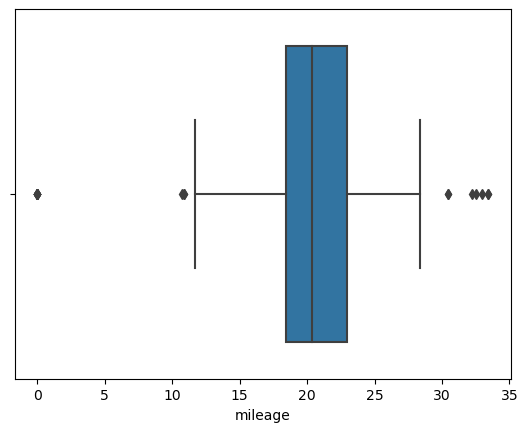

In [31]:
# show the boxplot for 'mileage' column
sns.boxplot(x=df['mileage'])
plt.show()

In [32]:
# set q1 and q3 values, determine IQR, set upper bound and lower bound and apply it on our DataFrame df for 'mileage' column
q1 = df['mileage'].quantile(0.25)
q3 = df['mileage'].quantile(0.75)
IQR = q3 - q1 
lower_bound = q1-(1.5*IQR)
upper_bound = q3+(1.5*IQR)
df = df[~((df['mileage'] < lower_bound) | (df['mileage'] > upper_bound))]

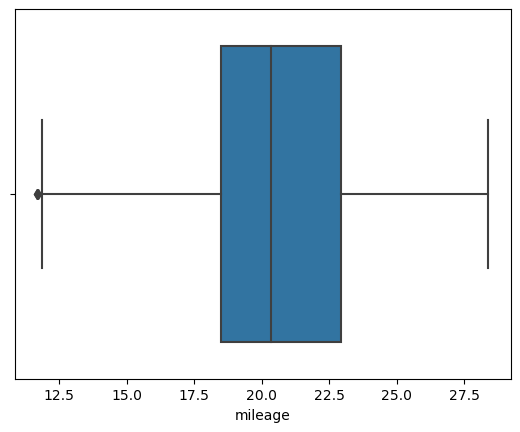

In [33]:
# show the boxplot for 'mileage' column and observe the difference
sns.boxplot(x=df['mileage'])
plt.show()

### DataFrame Index

In [34]:
# check the index of dataframe
df.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       8115, 8116, 8118, 8119, 8120, 8121, 8122, 8123, 8124, 8125],
      dtype='int64', length=5477)

The dataframe index is irregular above. The range and length are unequal, so it's important to reset the dataframe index. 

In [35]:
# reset the index 
df.reset_index(inplace=True,drop=True)
# reset_index will delete the index instead of inserting it back into the columns of the DataFrame
# if we don't do drop=True, then it will create a column in our df which will contain the old index values
df.tail()

,price,kms,fuel,seller,transmission,owner,mileage,engine,power,seats,brand,old
5472,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,Maruti Wagon,10
5473,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0,Hyundai i20,9
5474,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,Hyundai i20,10
5475,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,Hyundai Verna,16
5476,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,Maruti Swift,14


### Useful packages for visualizations in python
#### Matplotlib
Matplotlib is a visualization library in Python for 2D plots of arrays. It is written in Python and makes use of the NumPy library. Matplotlib comes with a wide variety of plots like line, bar, scatter, histogram, etc. which can help us, deep-dive, into understanding trends, patterns, correlations. 

#### Seaborn
Seaborn is a dataset-oriented library for making statistical representations in Python. It is developed on top of matplotlib and to create different visualizations. It is integrated with pandas data structures.

## Visualizing Univariate Distributions

**1. Histogram & Density Plots** 

- Creating the histogram provides the Visual representation of data distribution. 
- By using a histogram we can represent a large amount of data, and its frequency. 
- Density Plot is the continuous and smoothed version of the Histogram estimated from the data.

/var/folders/s_/xk50cnvs1bv24p4gx0z3wt1h0000gn/T/ipykernel_89638/2296448369.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['power'])


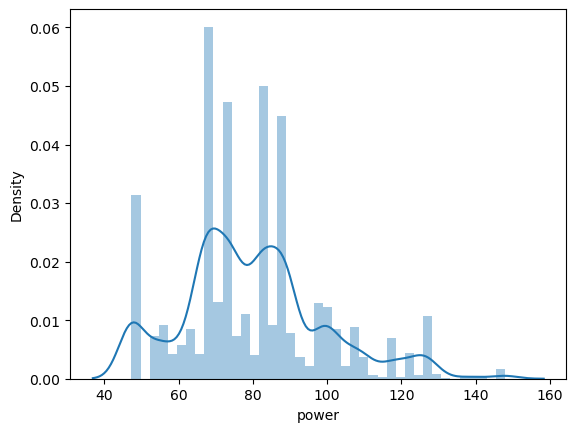

In [40]:
# Plot a histogram for "power" col
sns.distplot(df['power'])
plt.show()

Listing the numerical columns from this dataset

In [42]:
# make a list of all the columns which contain numerical values
num_cols = list(df.loc[:, df.dtypes != object].columns)
num_cols

['price', 'kms', 'mileage', 'engine', 'power', 'seats', 'old']

/var/folders/s_/xk50cnvs1bv24p4gx0z3wt1h0000gn/T/ipykernel_89638/645941853.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/var/folders/s_/xk50cnvs1bv24p4gx0z3wt1h0000gn/T/ipykernel_89638/645941853.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
/var/folders/s_/xk50cnvs1bv2

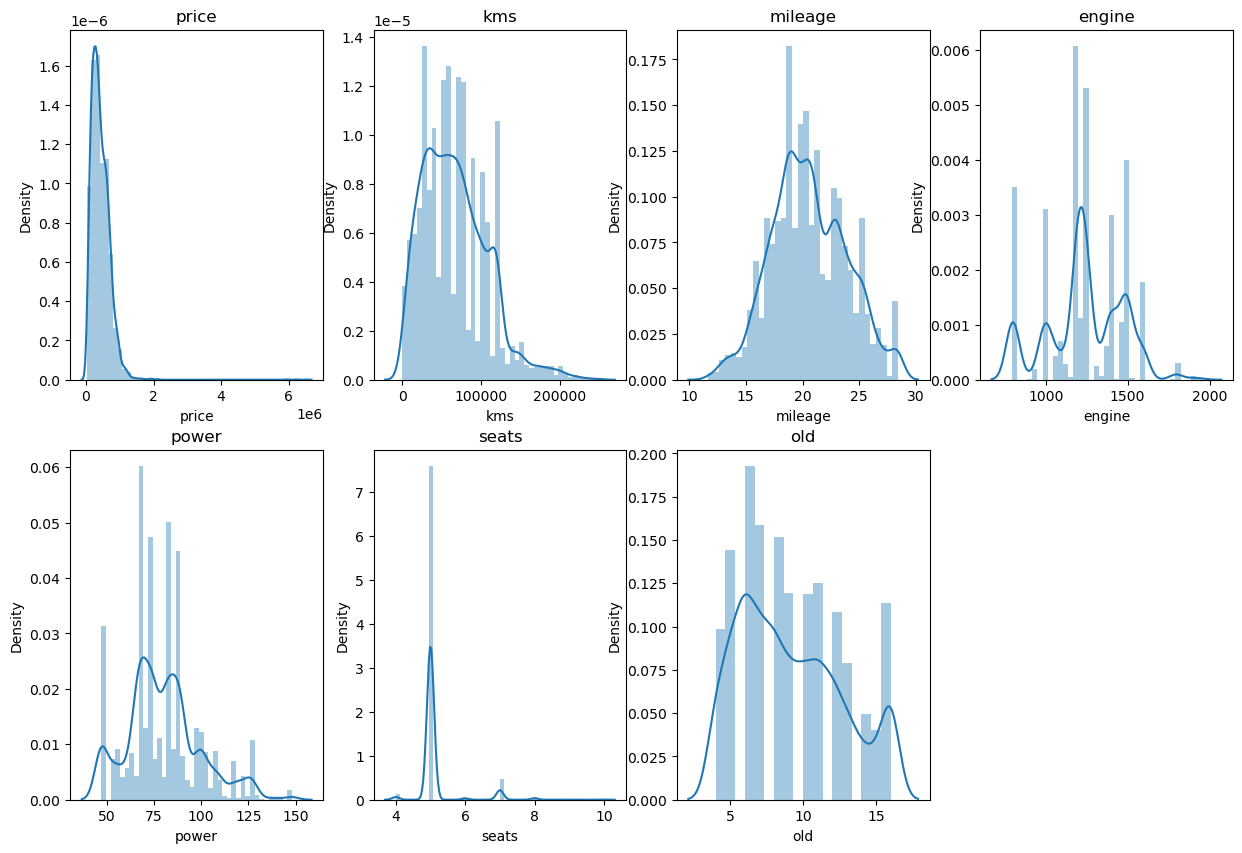

In [43]:
# plot all the columns in num_cols together using subplot of dimention (2,3).
c=0
plt.figure(figsize=(15,10))
for i in num_cols:
 c=c+1
 plt.subplot(2, 4, c)
 plt.title(i)
 sns.distplot(df[i])
plt.show()

**Bar Plot**

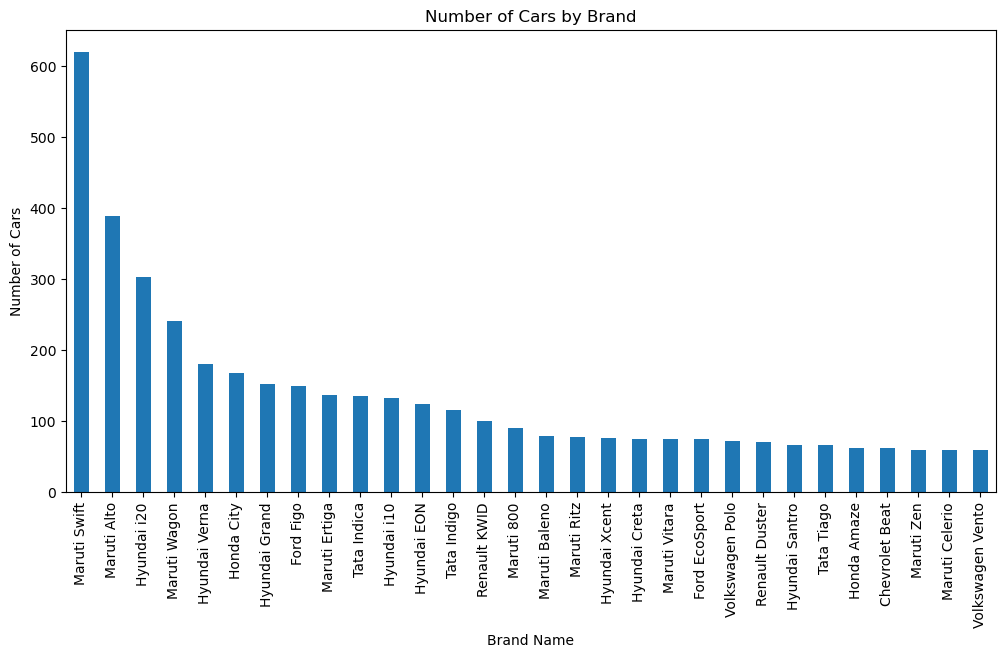

In [47]:
# Plot a bar graph for number of cars vs each brand
plt.figure(figsize = (12,8))
df.brand.value_counts().nlargest(30).plot(kind='bar',figsize=(12,6))
plt.title('Number of Cars by Brand')
plt.ylabel('Number of Cars')
plt.xlabel('Brand Name');

**3. Count Plot**
- It can be helpful to show the frequency of different classes present in a column 

In [50]:
print(df['fuel'].dtype)
print(df['fuel'].unique())


object
['Diesel' 'Petrol' 'LPG' 'CNG']


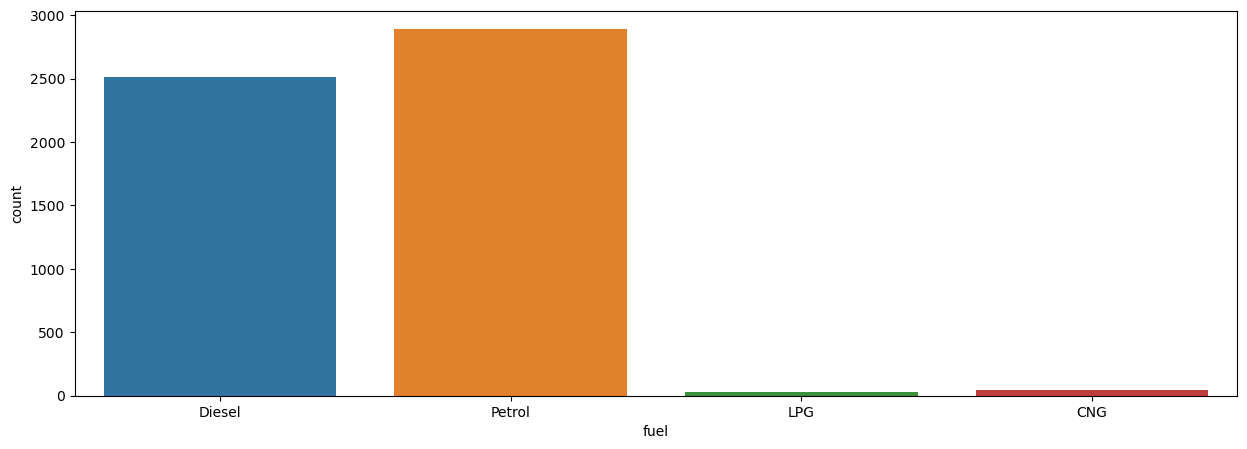

In [51]:
# Show a countplot for "fuel" col
plt.figure(figsize=(15,5))
sns.countplot(x='fuel', data=df)
plt.show()

**Pie Plot**

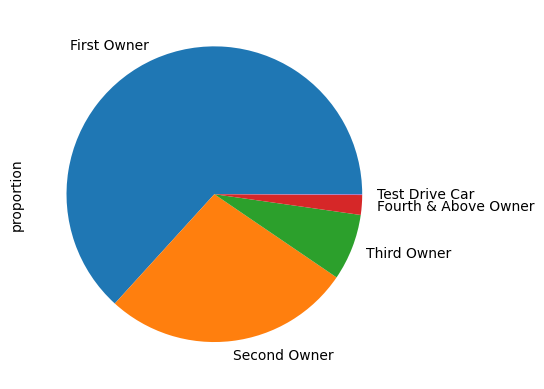

In [52]:
# plot the pie chart of seller categories
df.owner.value_counts(normalize=True).plot.pie()
plt.show()

## Visualizing Bivariate(Two Variable) Distributions

**Scatter Plot**

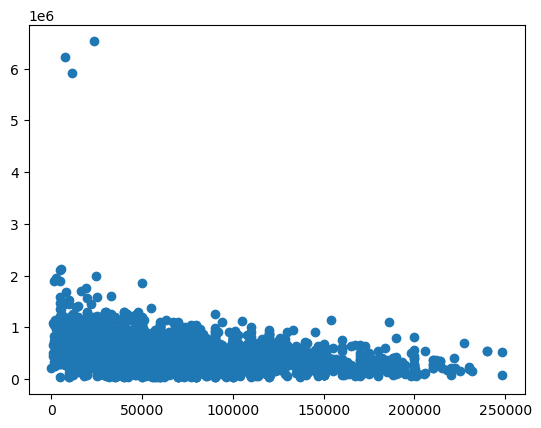

In [53]:
# plot the scatter plot of price and kms variable in data
plt.scatter(df.kms,df.price)
plt.show()

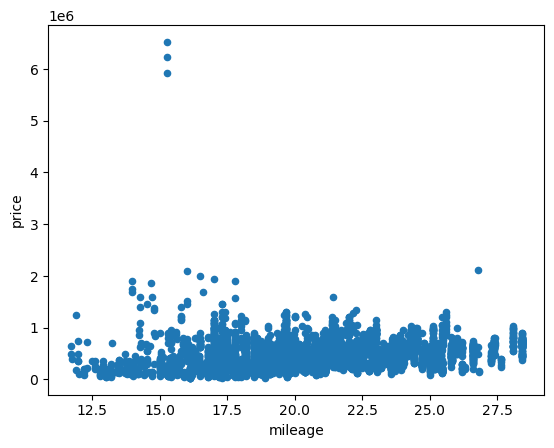

In [57]:
# plot the scatter plot of 'price' and 'mileage'
df.plot.scatter(x="mileage",y="price")
plt.show()

**Line Plot**

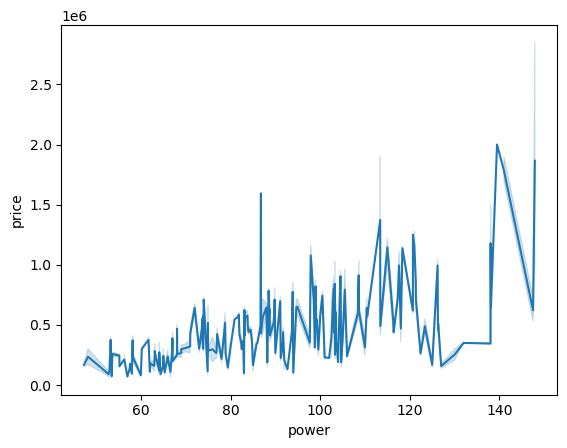

In [58]:
# show a lineplot for "price" vs "power"
sns.lineplot(x='power',y='price',data = df)
plt.show()

**Box Plot**

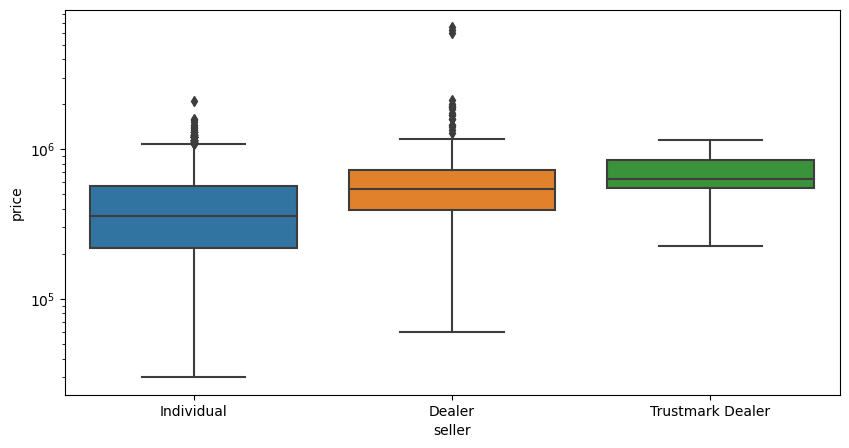

In [59]:
# boxplot of 'price' vs 'seller'
plt.figure(figsize=(10,5))
sns.boxplot(x='seller', y='price', data=df)
plt.yscale('log')
plt.show()

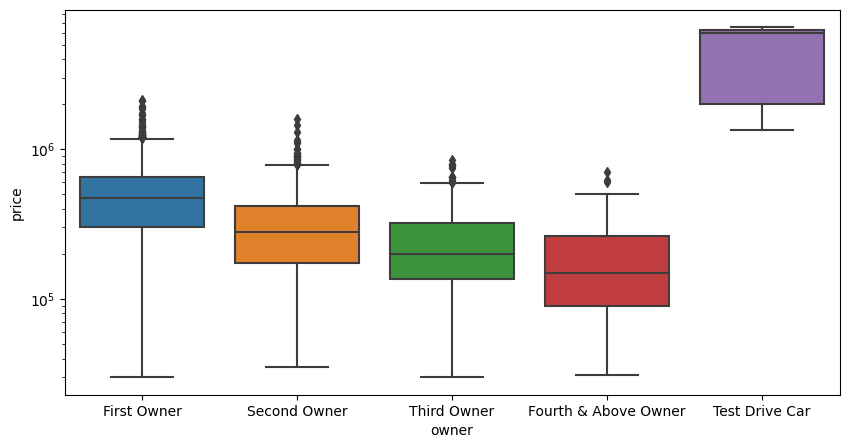

In [60]:
# boxplot of 'price' vs 'owner'
plt.figure(figsize=(10,5))
sns.boxplot(x='owner', y='price', data=df)
plt.yscale('log')
plt.show()

**Violin Plot**

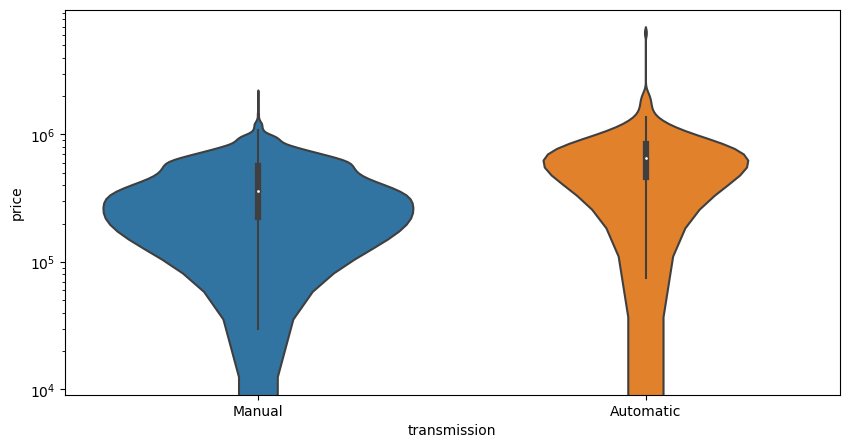

In [61]:
# violinplot of 'price' vs 'transmission'
plt.figure(figsize=(10,5))
sns.violinplot(x='transmission', y='price', data=df)
plt.yscale('log')
plt.show()

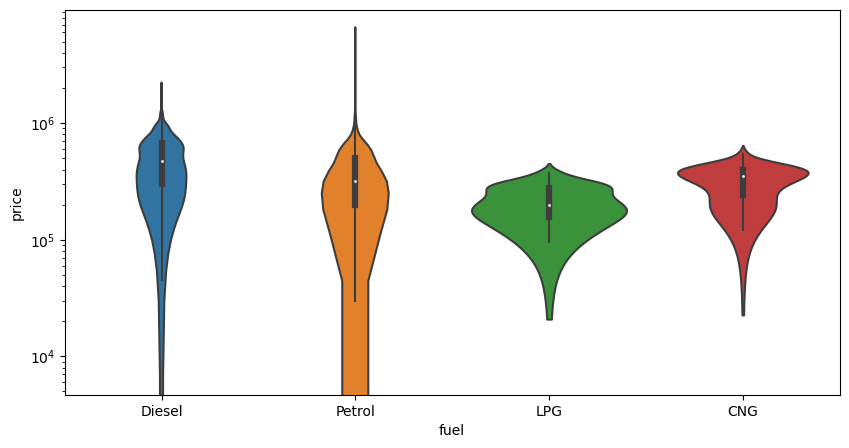

In [62]:
# violinplot of 'price' vs 'fuel'
plt.figure(figsize=(10,5))
sns.violinplot(x='fuel', y='price', data=df)
plt.yscale('log')
plt.show()

**Joint Plot**

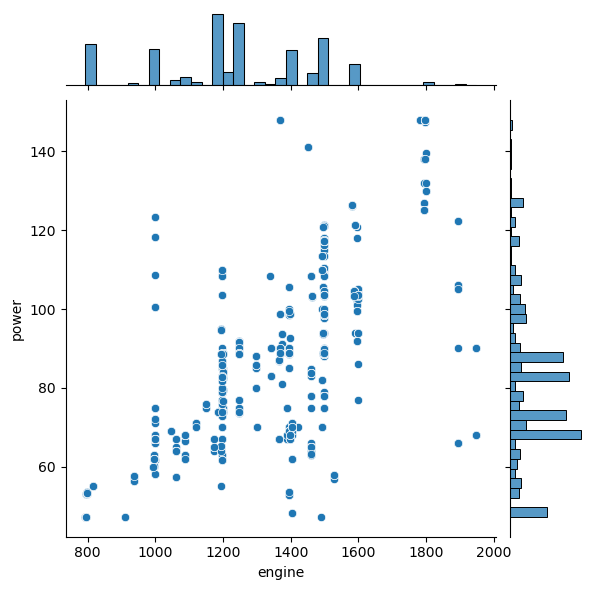

In [66]:
# joint plot of engine and power
sns.jointplot(x='engine',y='power',data=df)
plt.show()

Another way of visualizing a bivariate relationship using joint plot, in particular when we have a large amount of data, is the hexplot. A hexplot splits the plotting window into several hexbins and then the number of observations which fall into each bin corresponds with a color to indicate density. A darker color hexbin means that there are more observations, or more density, within that region.

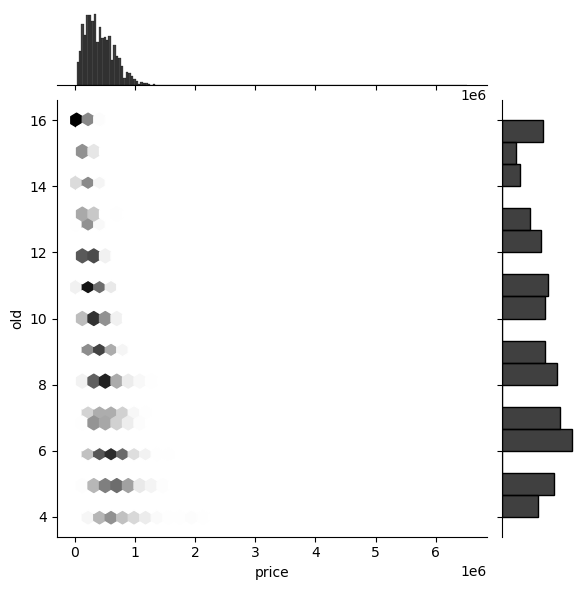

In [68]:
# joint plot of price and old
sns.jointplot(x='price',y='old',data = df,kind="hex", color="k")
plt.show()

## Visualizing Multivariate Distributions (2 or more). 

**Pair Plot**

/Users/brockjohnson/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


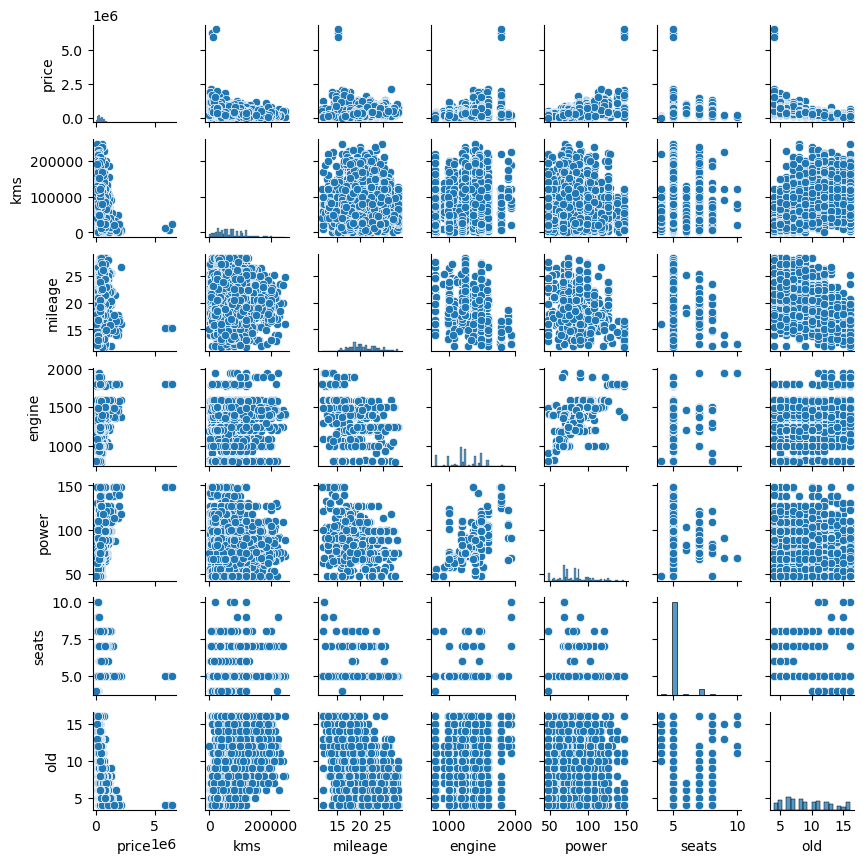

In [70]:
# plot the pairplot for data df
sns.pairplot(df,height=1.25)
plt.show()

/Users/brockjohnson/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/s_/xk50cnvs1bv24p4gx0z3wt1h0000gn/T/ipykernel_89638/2273929661.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


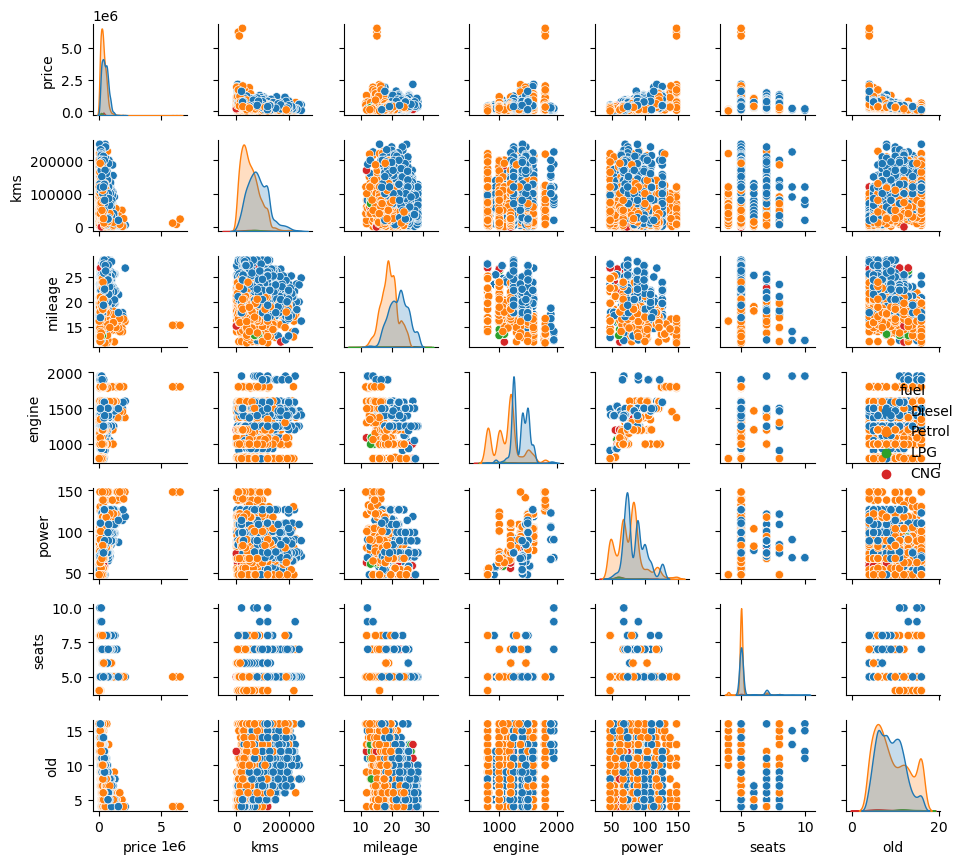

In [75]:
# plot a pairplot for data df with hue transmission
sns.pairplot(df,hue='fuel',height=1.25)
plt.tight_layout()
plt.show()

**Multivariate Scatter Plot**

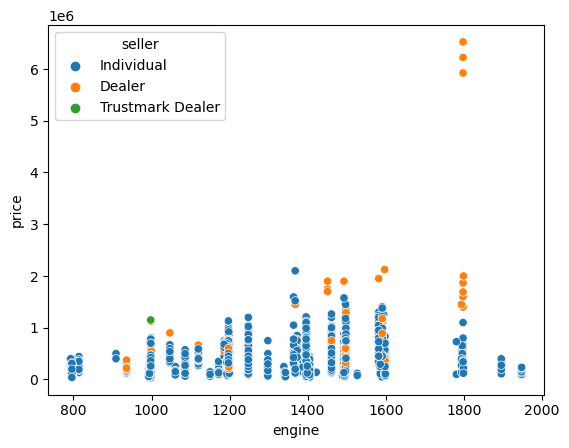

In [78]:
# multivariate scatterplot using seaborn
sns.scatterplot(x='engine',y='price',hue=df.seller, data = df)
plt.show()

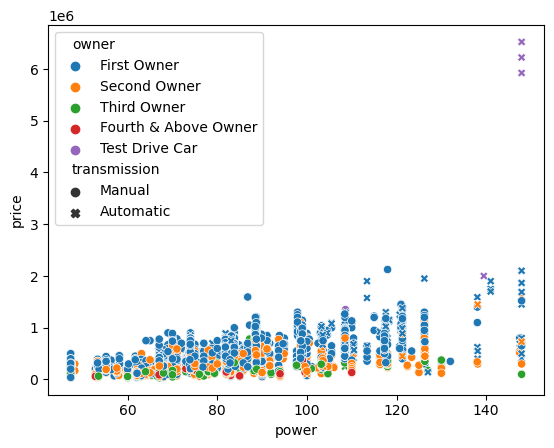

In [79]:
# multivariate scatterplot using seaborn
sns.scatterplot(x='power',y='price',hue='owner',style='transmission',data=df)
plt.show()

**Multivariate Bar Plot**

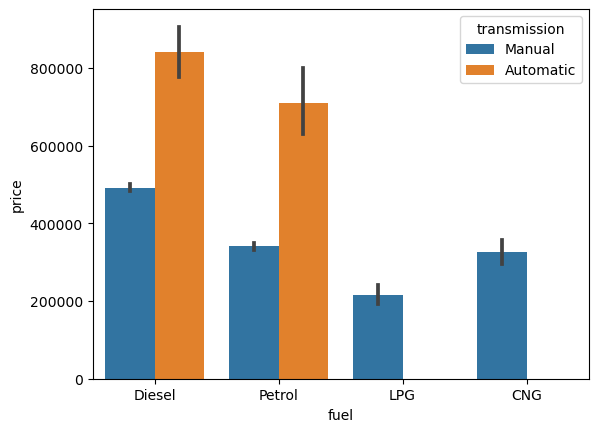

In [81]:
# show barplot for "price" vs "fuel" and show them separately for each transmission type
sns.barplot(x='fuel',y='price',hue='transmission',data=df)
# hue means a color or a shade so, here, hue="column name" means provide datapoints with different color for different classes of "column name"
plt.show()

**Heatmaps**

* A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. 

* A correlation heatmap is a graphical representation of a correlation matrix representing the correlation between different variables. The value of correlation can take any value from -1 to 1.

* The color of the cell is proportional to the value representing the relation between those two variables. This means that when you look at your heat map, you can quickly see which variables are highly correlated and which aren't.

In [83]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
train_corr = numeric_df.corr()

# Display the correlation matrix
print(train_corr)


            price       kms   mileage    engine     power     seats       old
price    1.000000 -0.313294  0.213228  0.391130  0.560715  0.156155 -0.646738
kms     -0.313294  1.000000 -0.083047  0.214608  0.003496  0.025864  0.506775
mileage  0.213228 -0.083047  1.000000 -0.139579 -0.136386 -0.078308 -0.432364
engine   0.391130  0.214608 -0.139579  1.000000  0.806896  0.152518 -0.045036
power    0.560715  0.003496 -0.136386  0.806896  1.000000  0.104945 -0.218049
seats    0.156155  0.025864 -0.078308  0.152518  0.104945  1.000000 -0.155505
old     -0.646738  0.506775 -0.432364 -0.045036 -0.218049 -0.155505  1.000000


In [82]:
# find the correlation of features of the data
train_corr = df.corr()
train_corr

ValueError: could not convert string to float: 'Diesel'

Text(0.5, 1.0, 'Simple Heatmap')

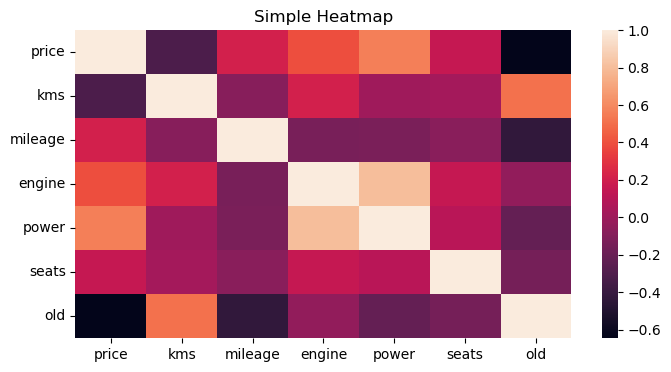

In [84]:
# plot a simple heatmap using the correlations found above
fig,ax = plt.subplots(figsize=(8,4))
sns.heatmap(train_corr)
ax.set_title('Simple Heatmap')

Text(0.5, 1.0, 'cmap=Accent')

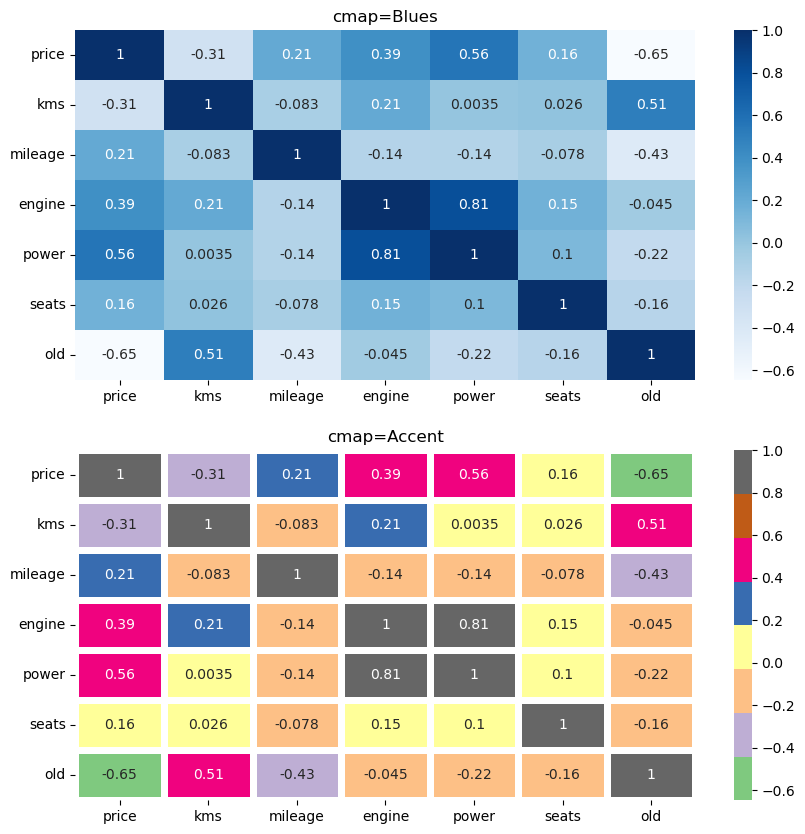

In [85]:
# plot variants of heatmaps using different parameters of sns.heatmap 
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(10,10))
sns.heatmap(train_corr,annot=True,ax=ax1,cmap="Blues")
sns.heatmap(train_corr,annot=True,ax=ax2,linewidth=5,cmap="Accent")
ax1.set_title("cmap=Blues")
ax2.set_title("cmap=Accent")

### Perfroming EDA is key to understand the data to help build more-generalized/better-performing models.